<h1 style="text-align:center; color:black;">Exploratory Data Analysis (EDA) of Football Player Attributes</h1>

In [ ]:
## Work Overview

This notebook covers the following topics:

- Data Loading
- Data Overview
- Univariate Analysis
- Multi-variate Analysis
- Data Cleaning
- Feture Selection
- Model Training and Evaluation
  


### Importing Libraries and Loading Data

In [83]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [2]:
data  = pd.read_csv('euro.csv')
data.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


### Data Overview

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [9]:
print("Column names:", data.columns.tolist())

Column names: ['Name', 'Position', 'Age', 'Club', 'Height', 'Foot', 'Caps', 'Goals', 'MarketValue', 'Country']


#### Columns Description

1. **Name**: The full name of the football player.
2. **Position**: The playing position of the player on the field (e.g., Forward, Midfielder, Defender, Goalkeeper).
3. **Age**: The age of the player in years.
4. **Club**: The name of the football club the player is currently associated with.
5. **Height**: The height of the player in centimeters.
6. **Foot**: The dominant foot of the player (e.g., Left, Right).
7. **Caps**: The number of appearances the player has made for their national team.
8. **Goals**: The total number of goals scored by the player.
9. **MarketValue**: The estimated market value of the player in millions of euros.
10. **Country**: The country the player represents at the international level.


In [10]:
# The shape of the dataset
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 623 rows and 10 columns.


In [20]:
# Number of players 
num_players = data['Name'].nunique()
print(f"The dataset contains {num_players}  players.")

The dataset contains 623  players.


In [6]:
# Statistical measurements
data.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [11]:
# Checking dublicated rows
data.duplicated().sum()

0

<div style="background-color: #e6f7ff; border-left: 6px solid #007bff; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <strong style="color: #007bff;">Note:</strong> There are no duplicated rows.
</div>

<Axes: >

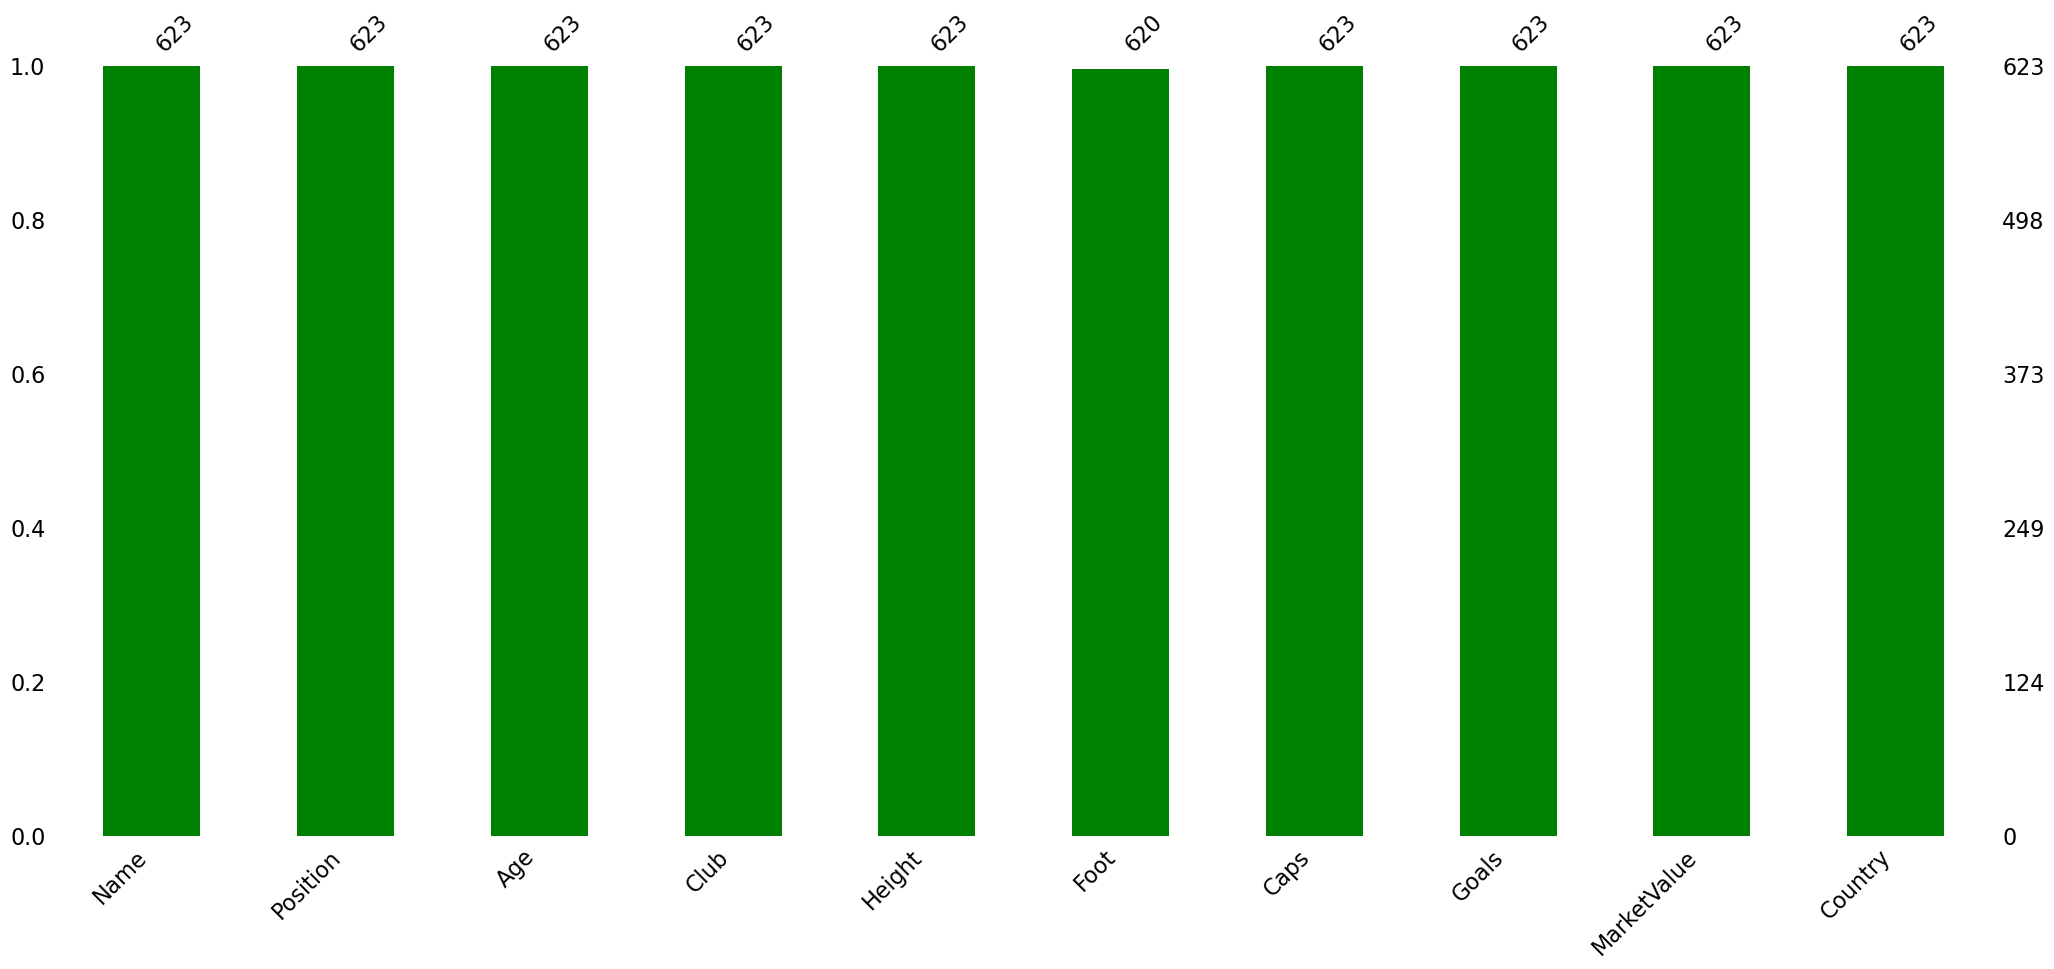

In [14]:
# Checking null values
msno.bar(data,color='g')

<div style="background-color: #e6f7ff; border-left: 6px solid #007bff; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
    <strong style="color: #007bff;">Note:</strong> There are no null values.
</div>


## Data Visualization

#### Univariate Analysis

In [35]:
def univariate(category, title):
    cat = category.value_counts()
    fig = px.bar(
        x=cat.index, 
        y=cat.values,
        color=cat.index, 
        labels={"x": category.name, "y": "Counts"},
    )
    
    fig.update_layout(
        title_text=title,  # Set the title parameter here
        title_x=0.5,  # Center align the title
        title_font_size=25,  # Adjust title font size
        title_font_family='Arial',  # Adjust title font family
        title_font_color='black'  # Adjust title font color
    )
    
    fig.show()

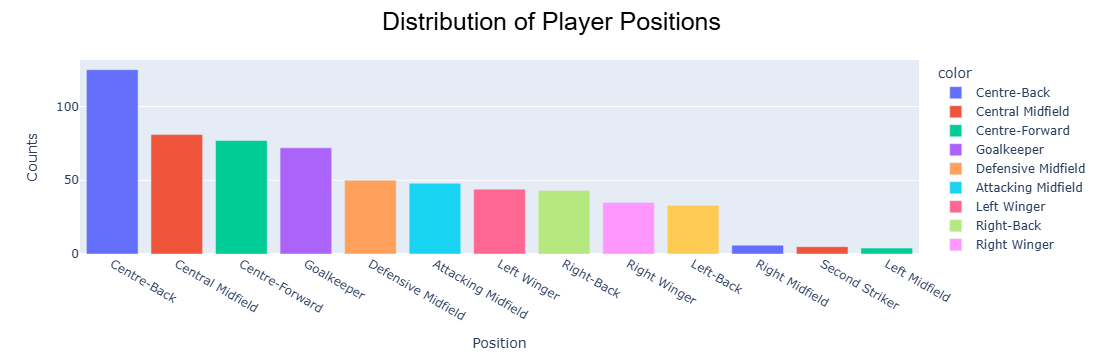

In [36]:
univariate(data['Position'],'Distribution of Player Positions')

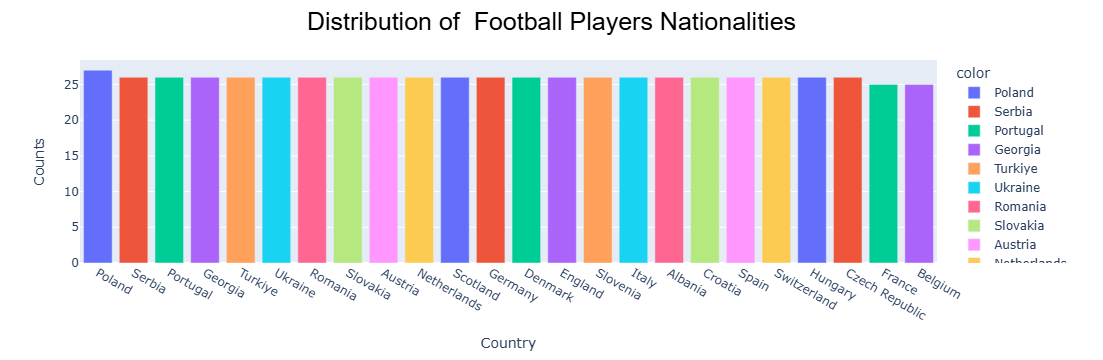

In [39]:
univariate(data['Country'],'Distribution of  Football Players Nationalities')

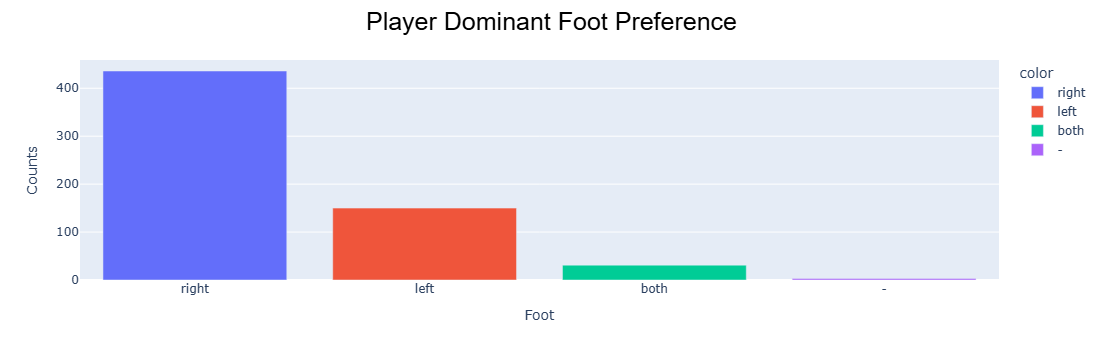

In [40]:
univariate(data['Foot'],'Player Dominant Foot Preference')

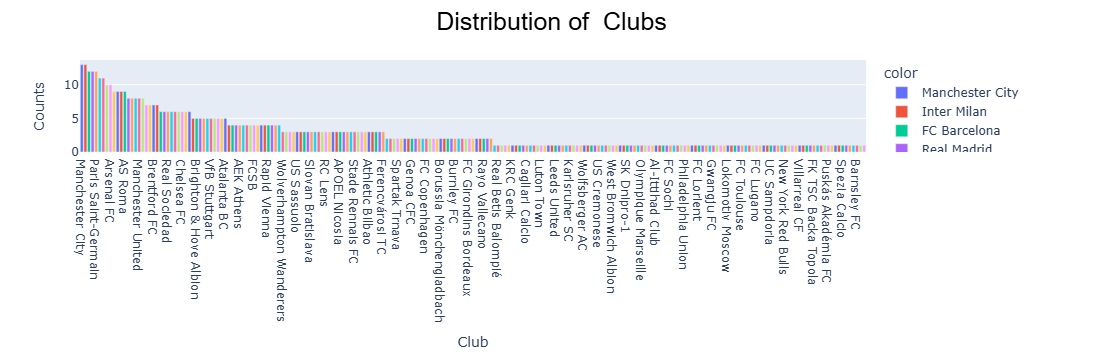

In [37]:
univariate(data['Club'],'Distribution of  Clubs')

we observe the following regarding the number of unique values in each categorical column:

- **Foot, Clubs, Position Columns**: These columns exhibit varying numbers of unique values, indicating a diverse range of categories. 

- **Country Column**: In contrast, the "Country" column shows a more consistent number of unique values.

In [43]:
def histogram ( data , x,title):
    fig = px.histogram(data , x )
    fig.update_layout(
        title={
            'text': title,
            'y':0.95,
            'x':0.5,
            'font': dict(
                size=24,
            )
        }
    )
    fig.show()

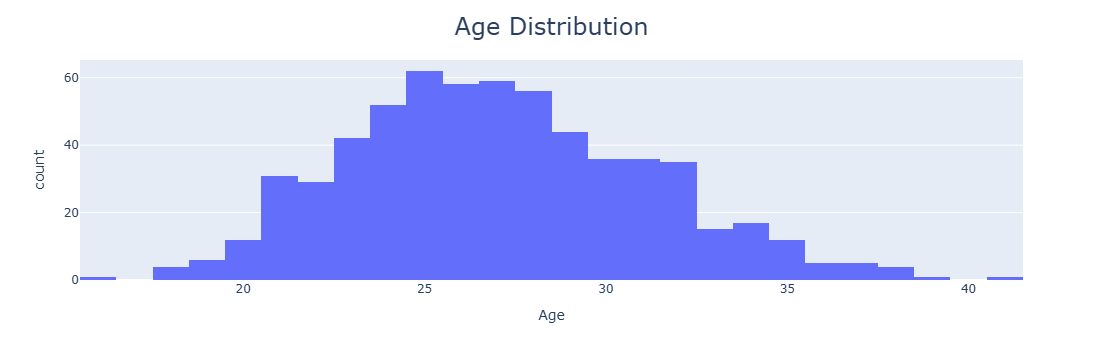

In [44]:
histogram(data , x = "Age", title="Age Distribution")

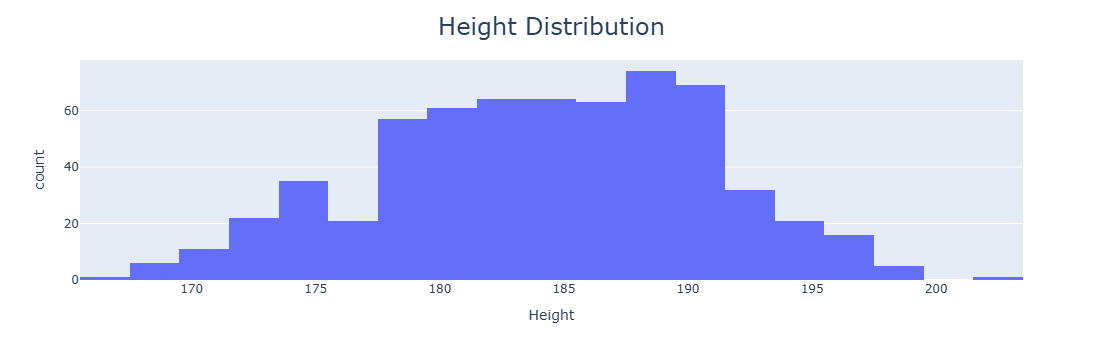

In [45]:
histogram(data , x = "Height", title="Height Distribution")

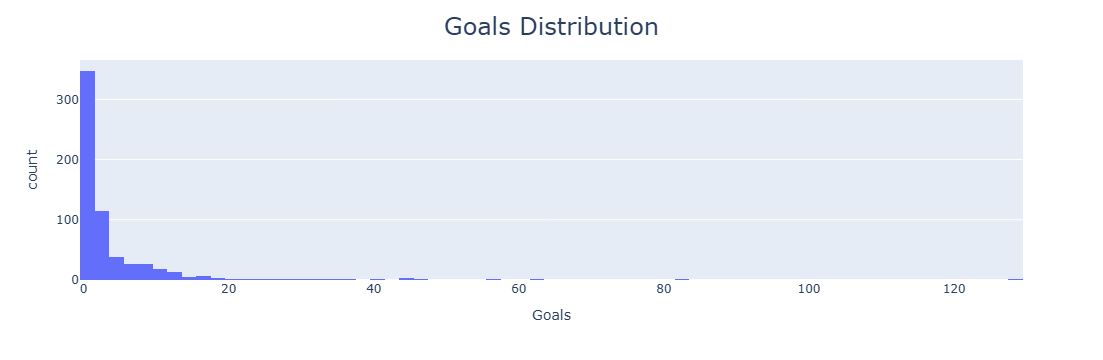

In [46]:
histogram(data , x = "Goals", title="Goals Distribution")

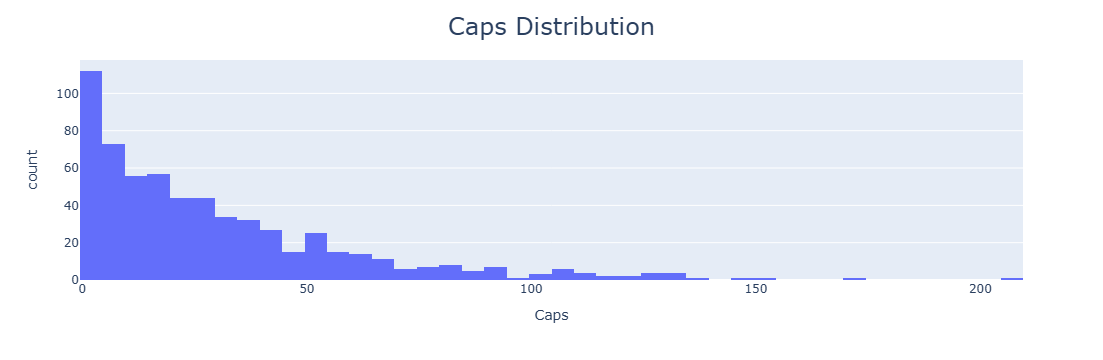

In [47]:
histogram(data , x = "Caps", title="Caps Distribution")

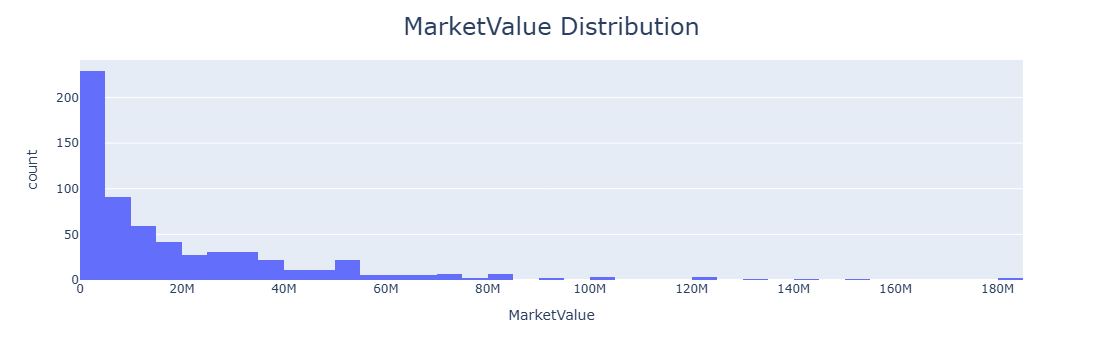

In [48]:
histogram(data , x = "MarketValue", title="MarketValue Distribution")

we observe the following distribution characteristics:

- **Height and Age**: The distributions of player heights and ages appear to be approximately **normal**.
- **Goals, Caps, and Market Value**: On the other hand, the distributions of goals scored, caps (appearances), and market values are **skewed to the left**. 

### Multivariate Analysis

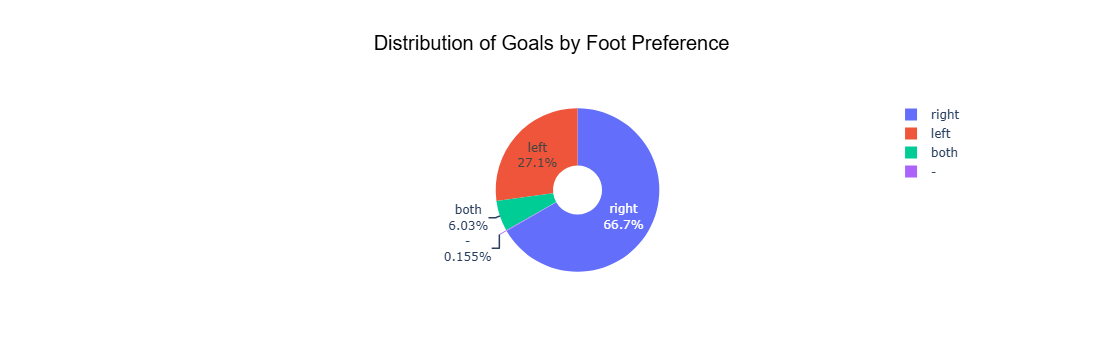

In [77]:
goals_by_foot = data.groupby('Foot')['Goals'].sum().reset_index()

fig = px.pie(goals_by_foot, values='Goals', names='Foot', 
             title='Distribution of Goals by Foot Preference',
             labels={'Foot': 'Foot Preference', 'Goals': 'Total Goals'})

fig.update_traces(textinfo='percent+label', pull=[0.1, 0], hole=0.3)  

fig.update_layout(
    title_x=0.5,  
    title_font_size=20,  
    title_font_family='Arial', 
    title_font_color='black'  
)

fig.show()


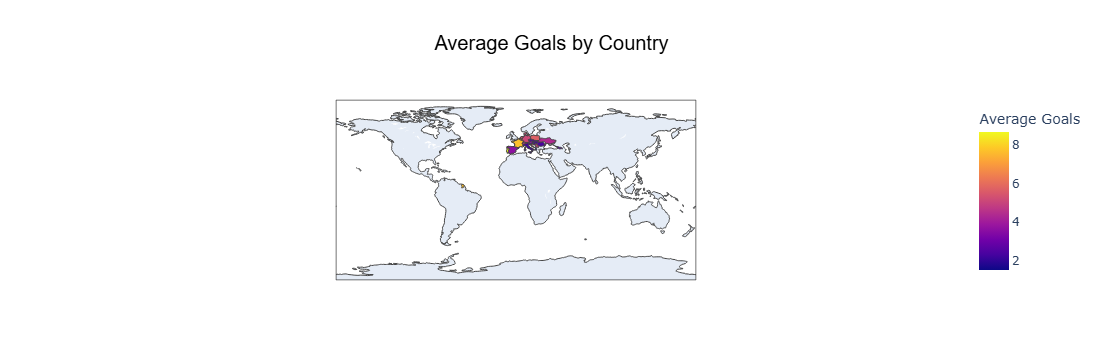

In [79]:
import plotly.express as px

# Example: Calculate average goals by country
avg_goals_by_country = data.groupby('Country')['Goals'].mean().reset_index()

fig = px.choropleth(avg_goals_by_country, 
                    locations='Country', 
                    locationmode='country names',
                    color='Goals',
                    hover_name='Country',
                    title='Average Goals by Country',
                    labels={'Goals': 'Average Goals'})

fig.update_layout(title_x=0.5, 
                  title_font_size=20,  
                  title_font_family='Arial',  
                  title_font_color='black')  

fig.show()


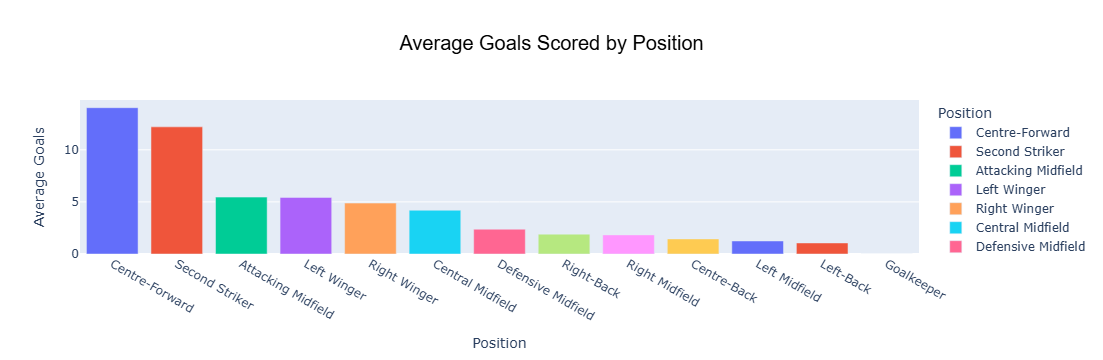

In [73]:
avg_goals_by_position = data.groupby('Position')['Goals'].mean().reset_index()
avg_goals_by_position = avg_goals_by_position.sort_values(by='Goals', ascending=False)

fig = px.bar(avg_goals_by_position, x='Position', y='Goals', 
             title='Average Goals Scored by Position',
             labels={'Position': 'Position', 'Goals': 'Average Goals'},
             color='Position')  

fig.update_layout(
    xaxis_title='Position',
    yaxis_title='Average Goals',
    title_x=0.5,  
    title_font_size=20,  
    title_font_family='Arial', 
    title_font_color='black'  
)

fig.show()


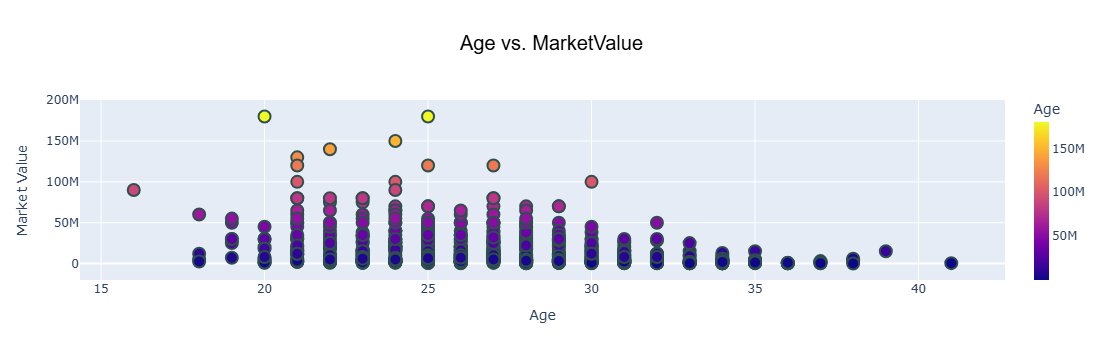

In [122]:
fig = px.scatter(data, x='Age', y='MarketValue', color='MarketValue',
                 title='Age vs. MarketValue',
                 labels={'Age': 'Age', 'MarketValue': 'Market Value'})

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(title_x=0.5,  
                  title_font_size=20,  
                  title_font_family='Arial',  
                  title_font_color='black',  
                  xaxis_title='Age', 
                  yaxis_title='Market Value', 
                  coloraxis_colorbar=dict(
                      title='Age', 
                      thicknessmode='pixels', 
                      thickness=15,  
                      lenmode='pixels', 
                      len=200,  
                  ))

fig.show()


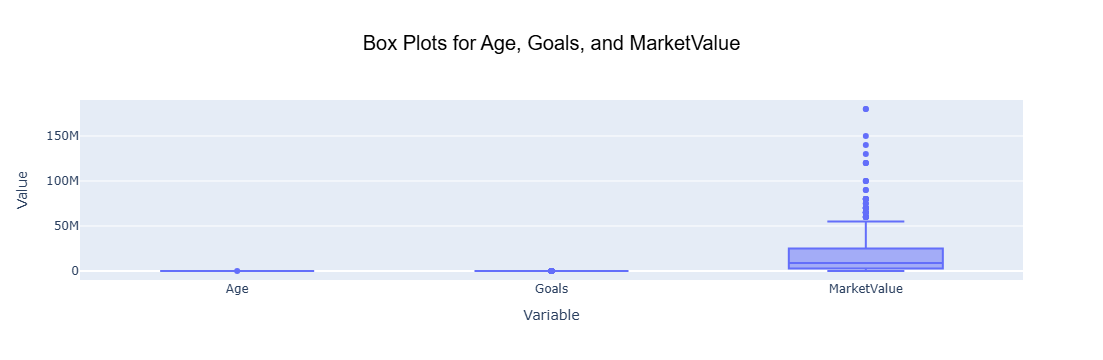

In [101]:
fig = px.box(data, y=['Age', 'Goals', 'MarketValue'],
             title='Box Plots for Age, Goals, and MarketValue',
             labels={'variable': 'Variable', 'value': 'Value'})

fig.update_layout(title_x=0.5, 
                  title_font_size=20, 
                  title_font_family='Arial',  
                  title_font_color='black',  
                  yaxis_title='Value')  

fig.show()


- **MarketValue Column**: There are outliers present.
- **Age and Goals Columns**: No outliers detected.

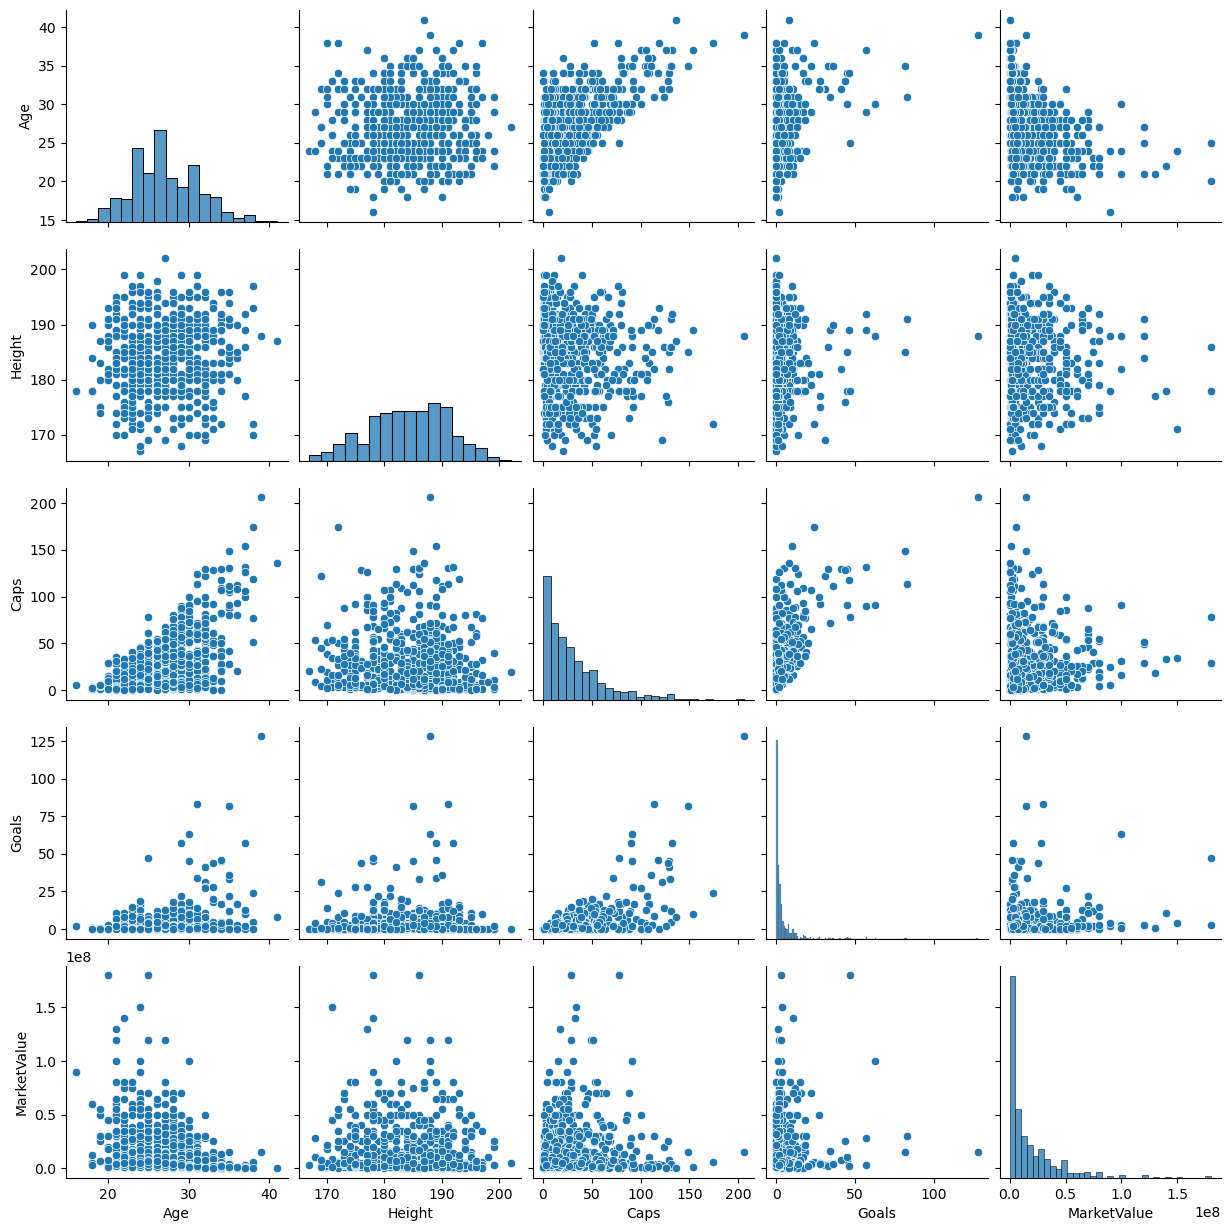

In [55]:
sns.pairplot(data)

In [84]:
def label_encode_categorical_columns(df):

    le = LabelEncoder()
    
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])
    
    return df
labled_data = label_encode_categorical_columns(data)    

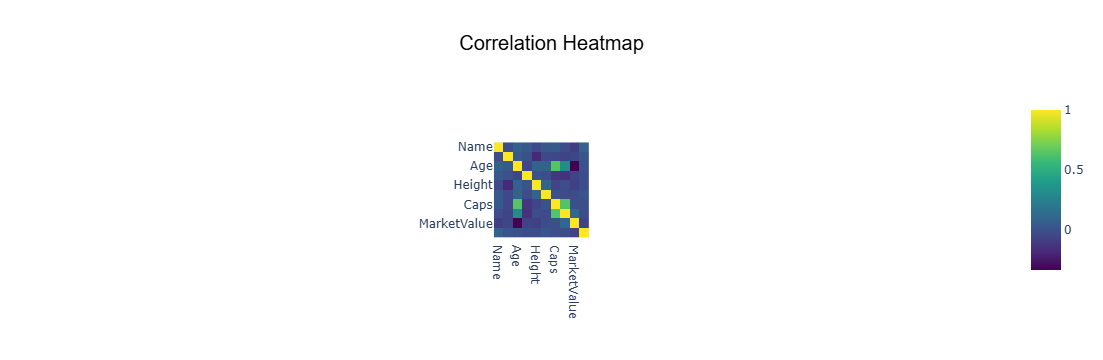

In [85]:


corr_matrix = labled_data.corr()

fig = px.imshow(corr_matrix,
                x=corr_matrix.index,
                y=corr_matrix.columns,
                color_continuous_scale='Viridis',
                title='Correlation Heatmap')

fig.update_layout(title_x=0.5,
                  title_font_size=20,  
                  title_font_family='Arial', 
                  title_font_color='black')  

fig.show()


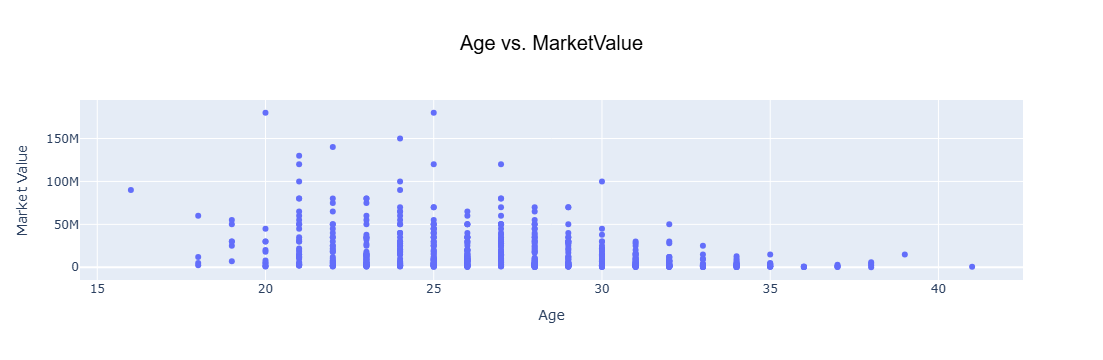

In [117]:
fig = px.scatter(data, x='Age', y='MarketValue',
                 title='Age vs. MarketValue',
                 labels={'Age': 'Age', 'MarketValue': 'Market Value'})

fig.update_layout(title_x=0.5, 
                  title_font_size=20, 
                  title_font_family='Arial',  
                  title_font_color='black',  
                  xaxis_title='Age',  
                  yaxis_title='Market Value') 
fig.show()
